# Census Income Project

Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Preview dataset
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# Shape of dataset
df.shape

(32560, 15)

In [6]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Descrioption of datset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Check for null values
df.isnull().sum() # dataset does not have any null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

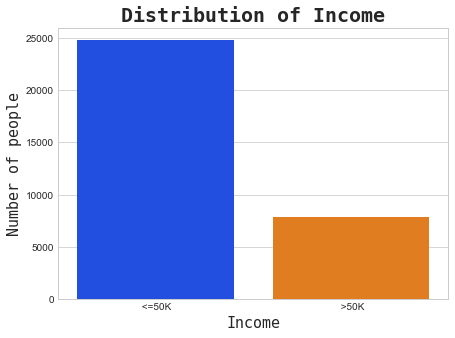

In [9]:
# Creating a barplot for 'Income'
income = df['Income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

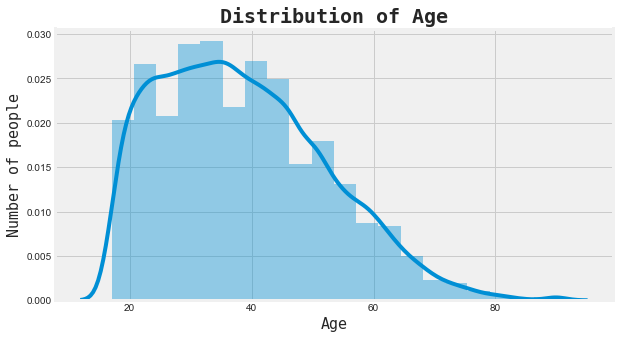

In [10]:
# Creating a distribution plot for 'Age'
age = df['Age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df['Age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()


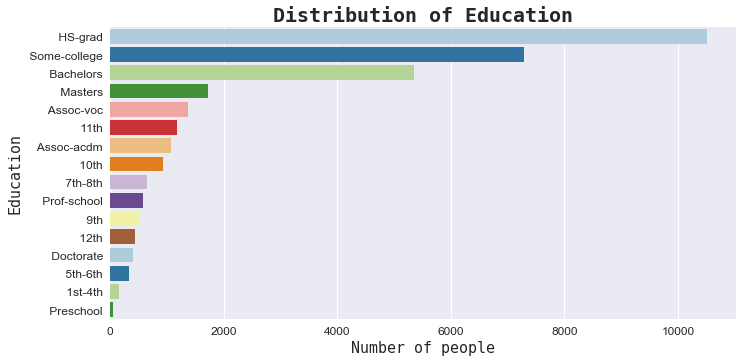

In [11]:
# Creating a barplot for 'Education'
edu = df['Education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

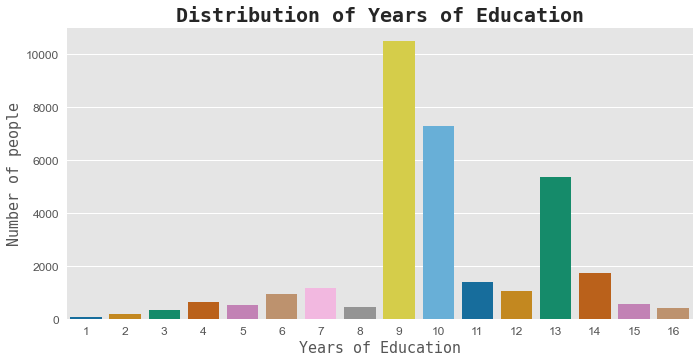

In [12]:
# Creating a barplot for 'Years of Education'
edu_num = df['Education_num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

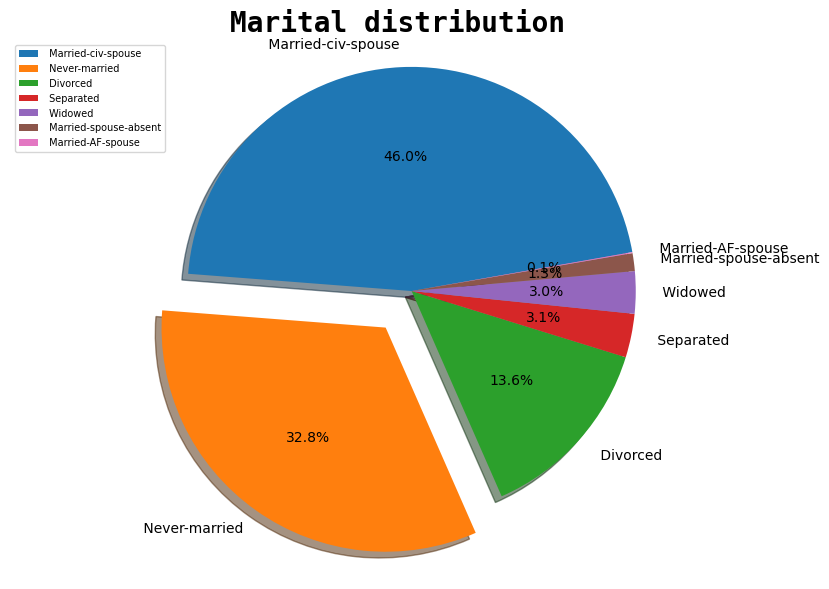

In [13]:
# Creating a pie chart for 'Marital status'
marital = df['Marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

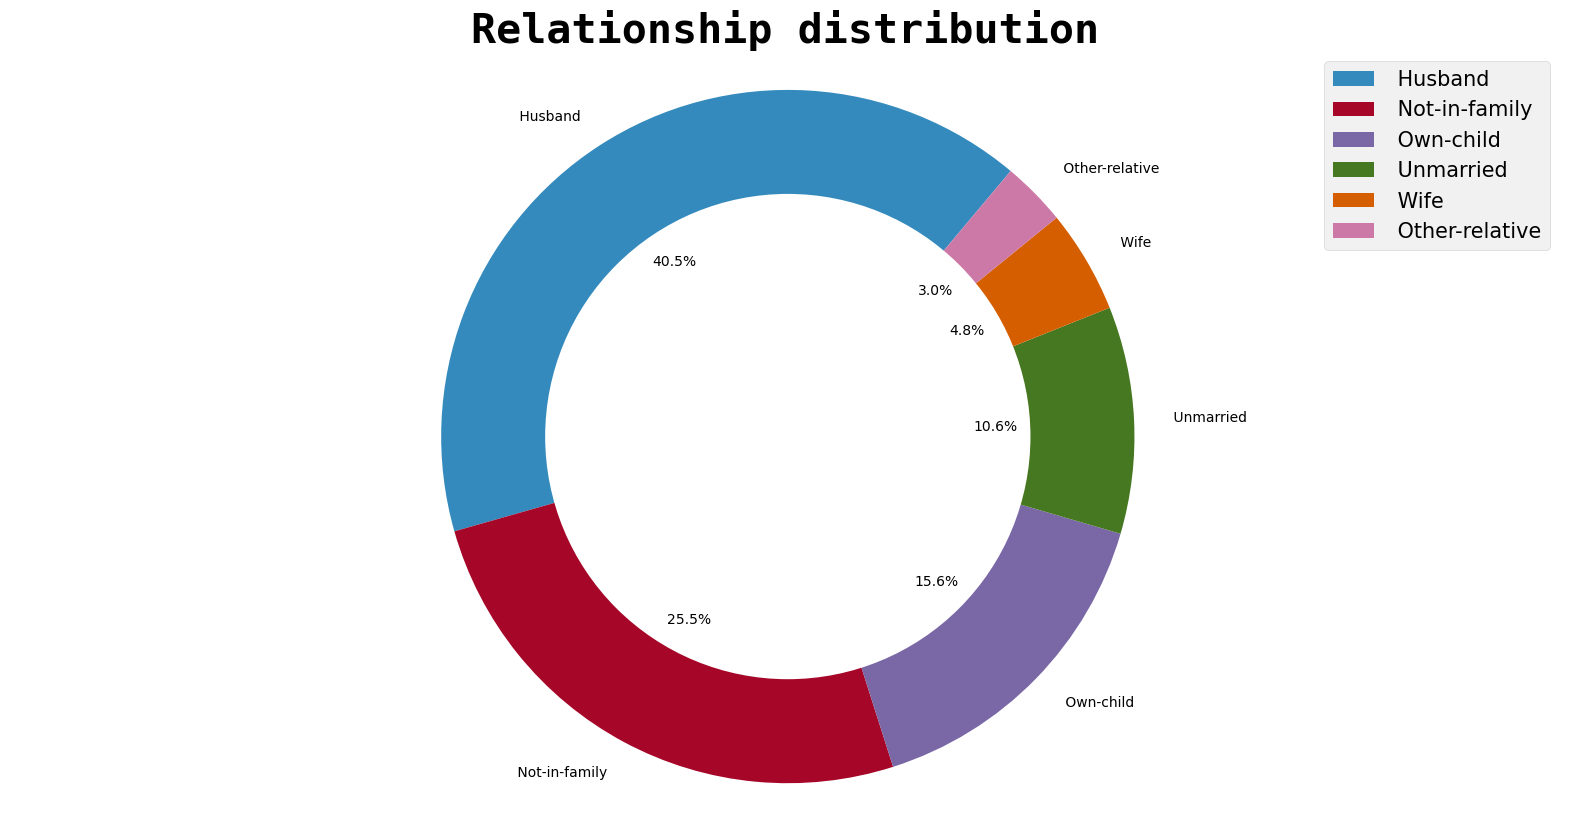

In [14]:
# Creating a donut chart for 'Age'
relation = df['Relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

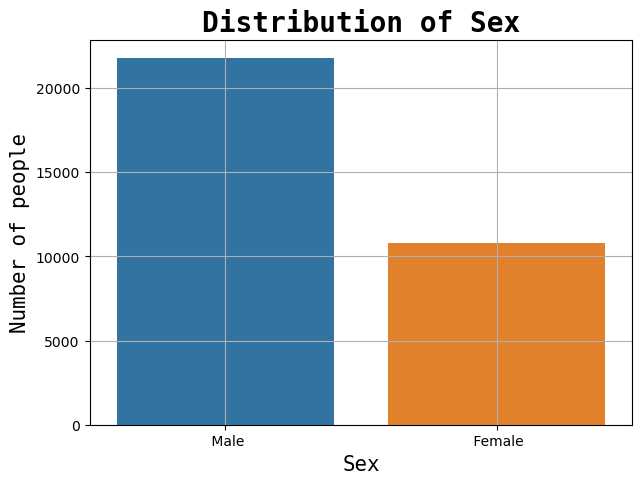

In [15]:
# Creating a barplot for 'Sex'
sex = df['Sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

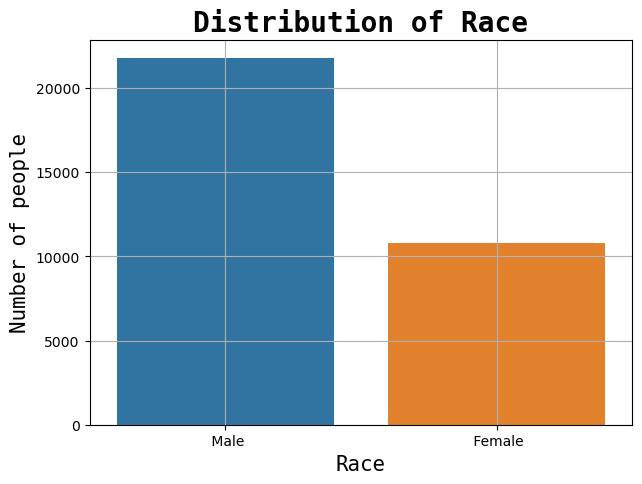

In [16]:
# Creating bar plot for race
race = df['Race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

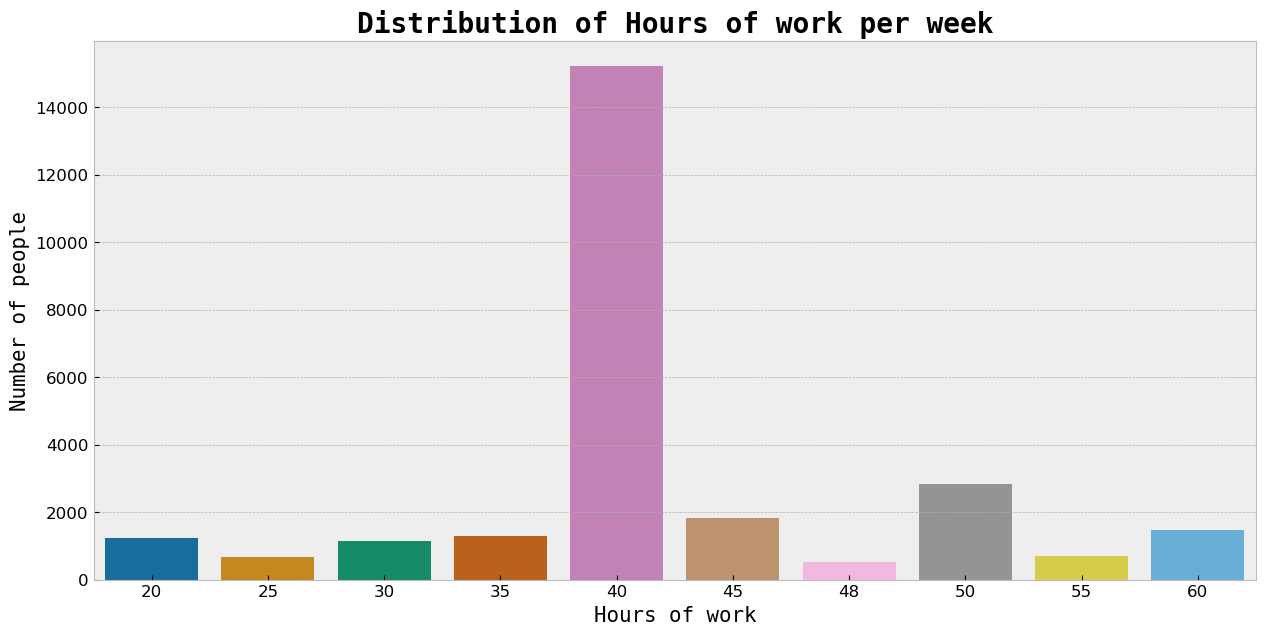

In [17]:
# Creating a barplot for 'Hours per week'
hours = df['Hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

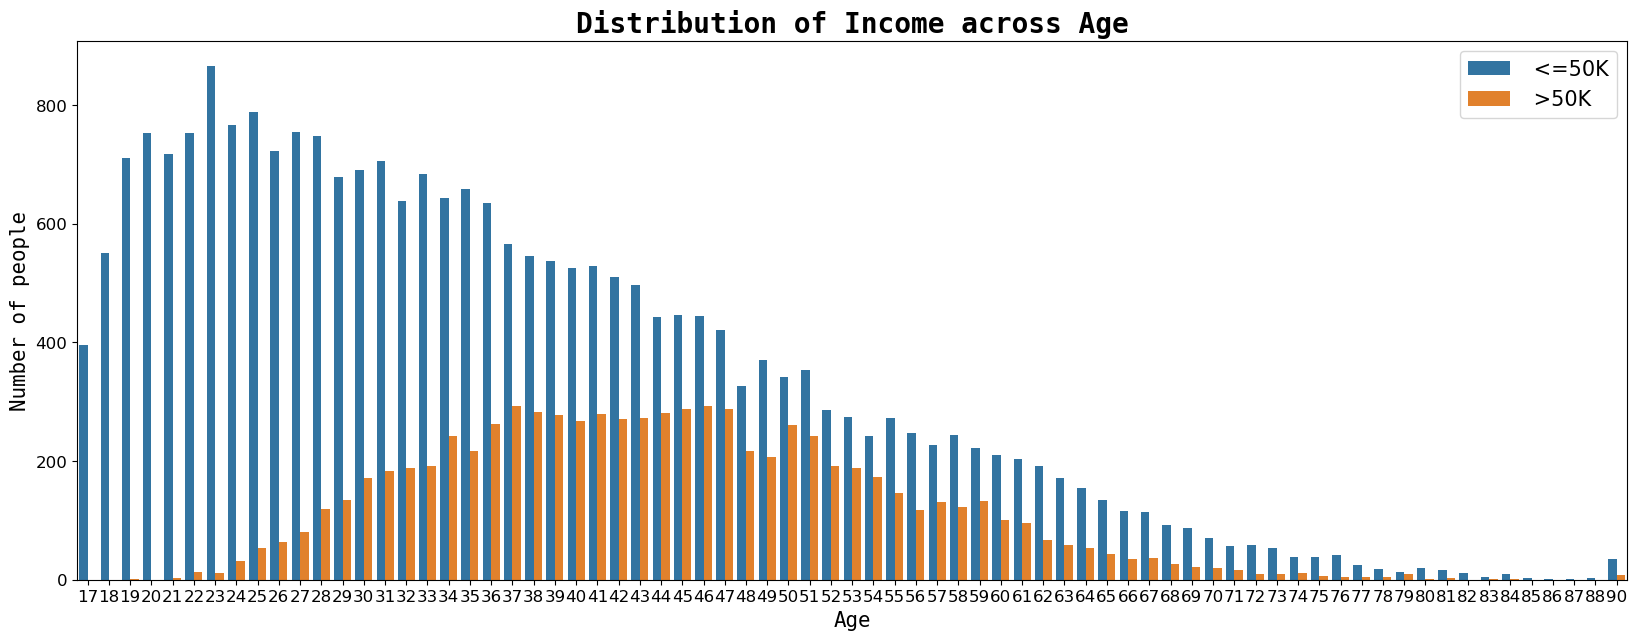

In [18]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(df['Age'], hue=df['Income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

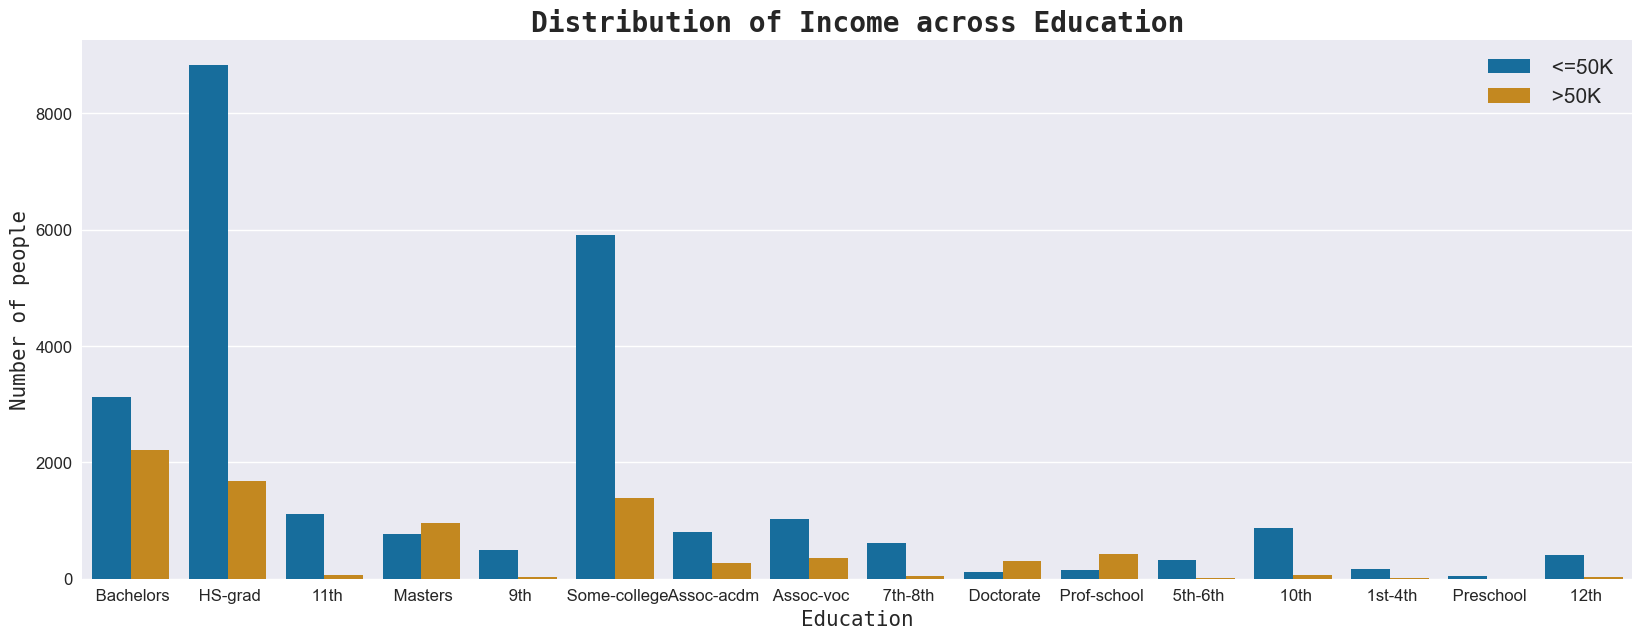

In [19]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['Education'],
              hue=df['Income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

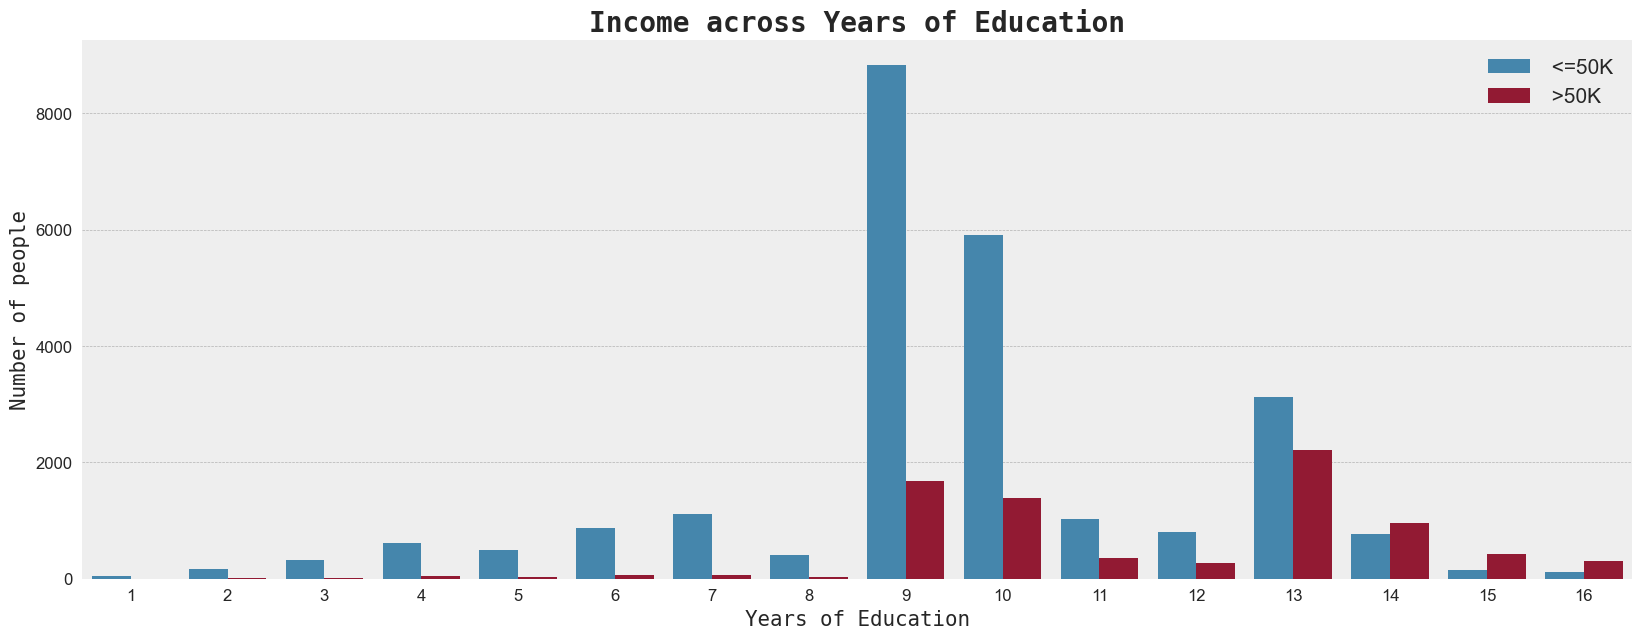

In [20]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(df['Education_num'],
              hue=df['Income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

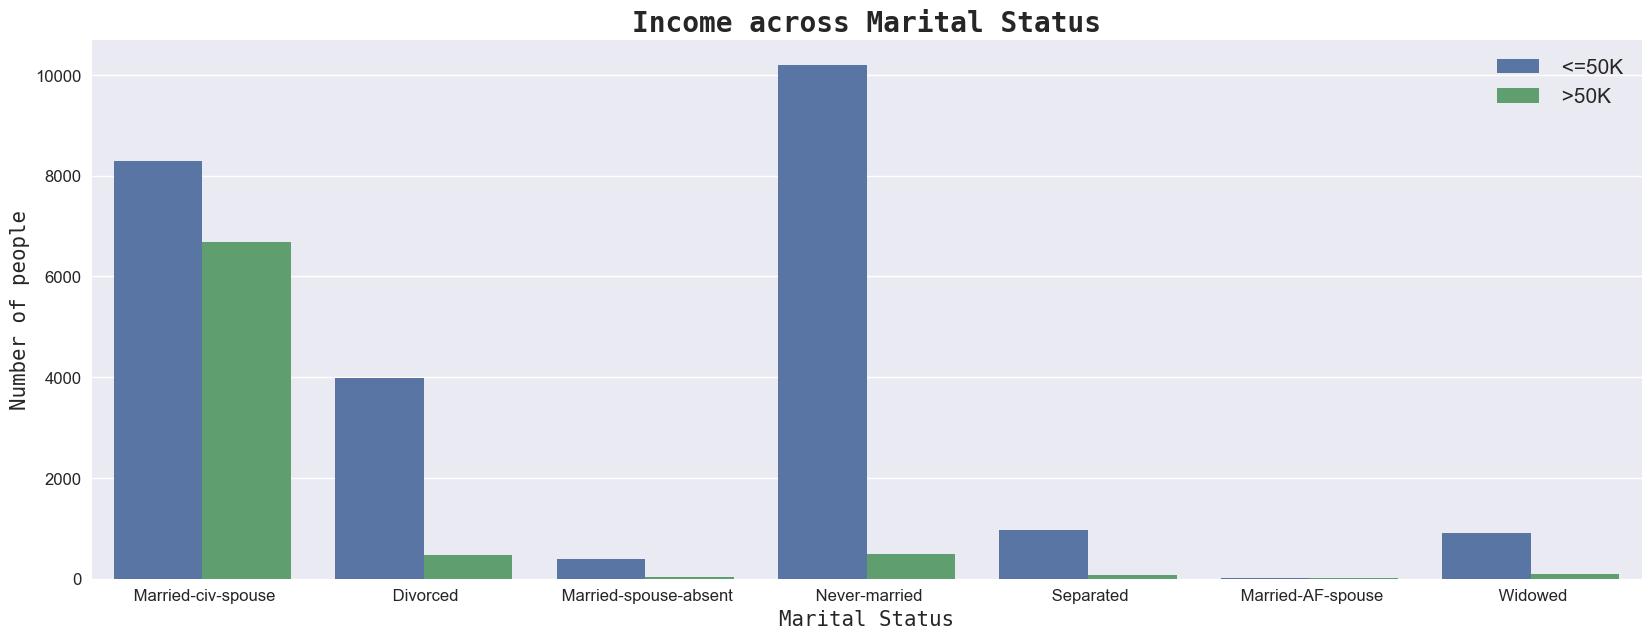

In [21]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['Marital_status'], hue=df['Income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

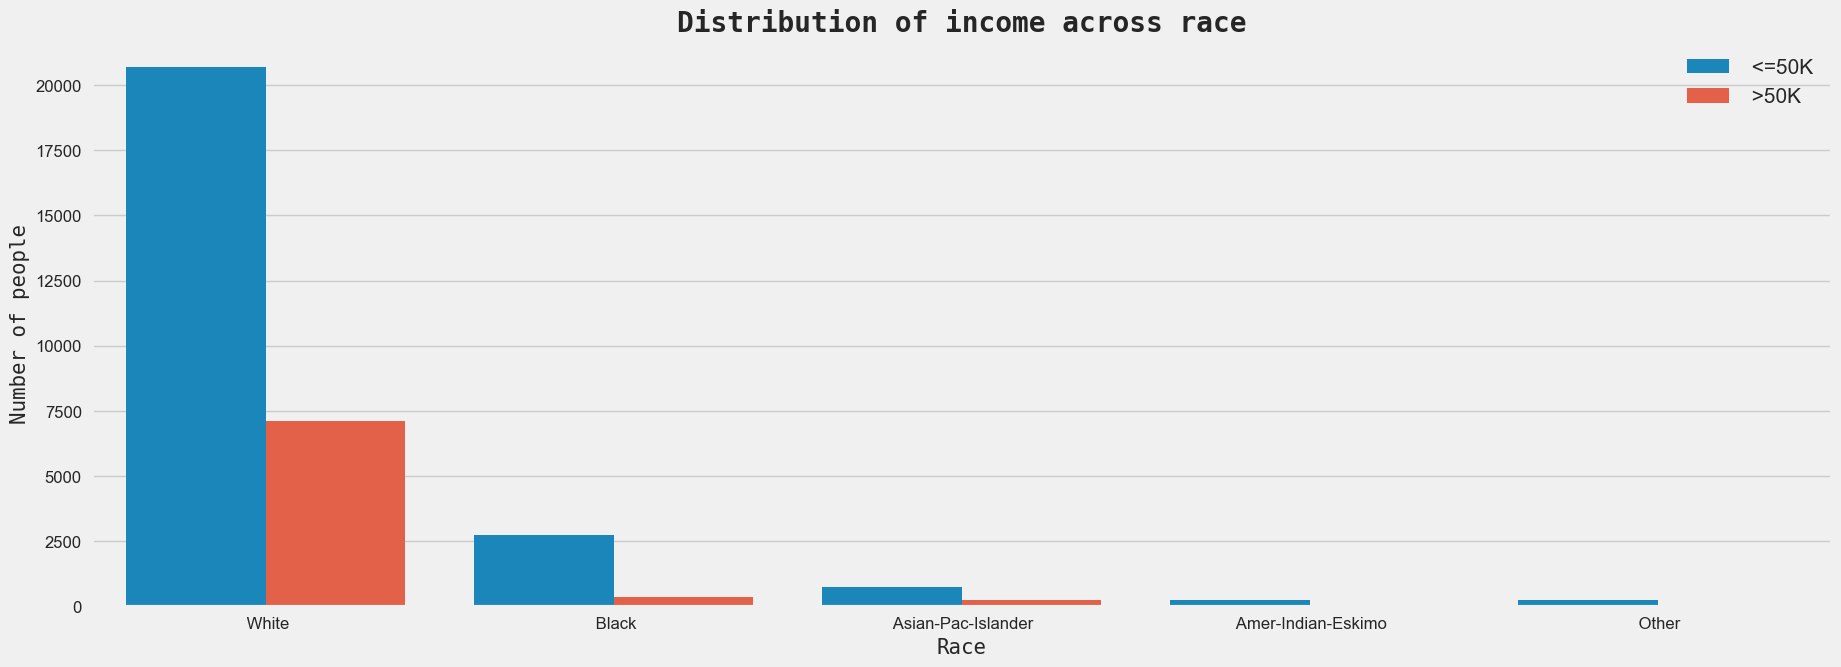

In [22]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(df['Race'], hue=df['Income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

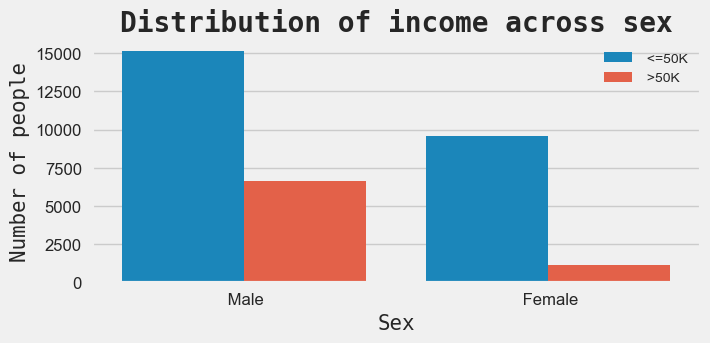

In [23]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(df['Sex'], hue=df['Income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

In [24]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
df['Income'] = le.fit_transform(df['Income'])

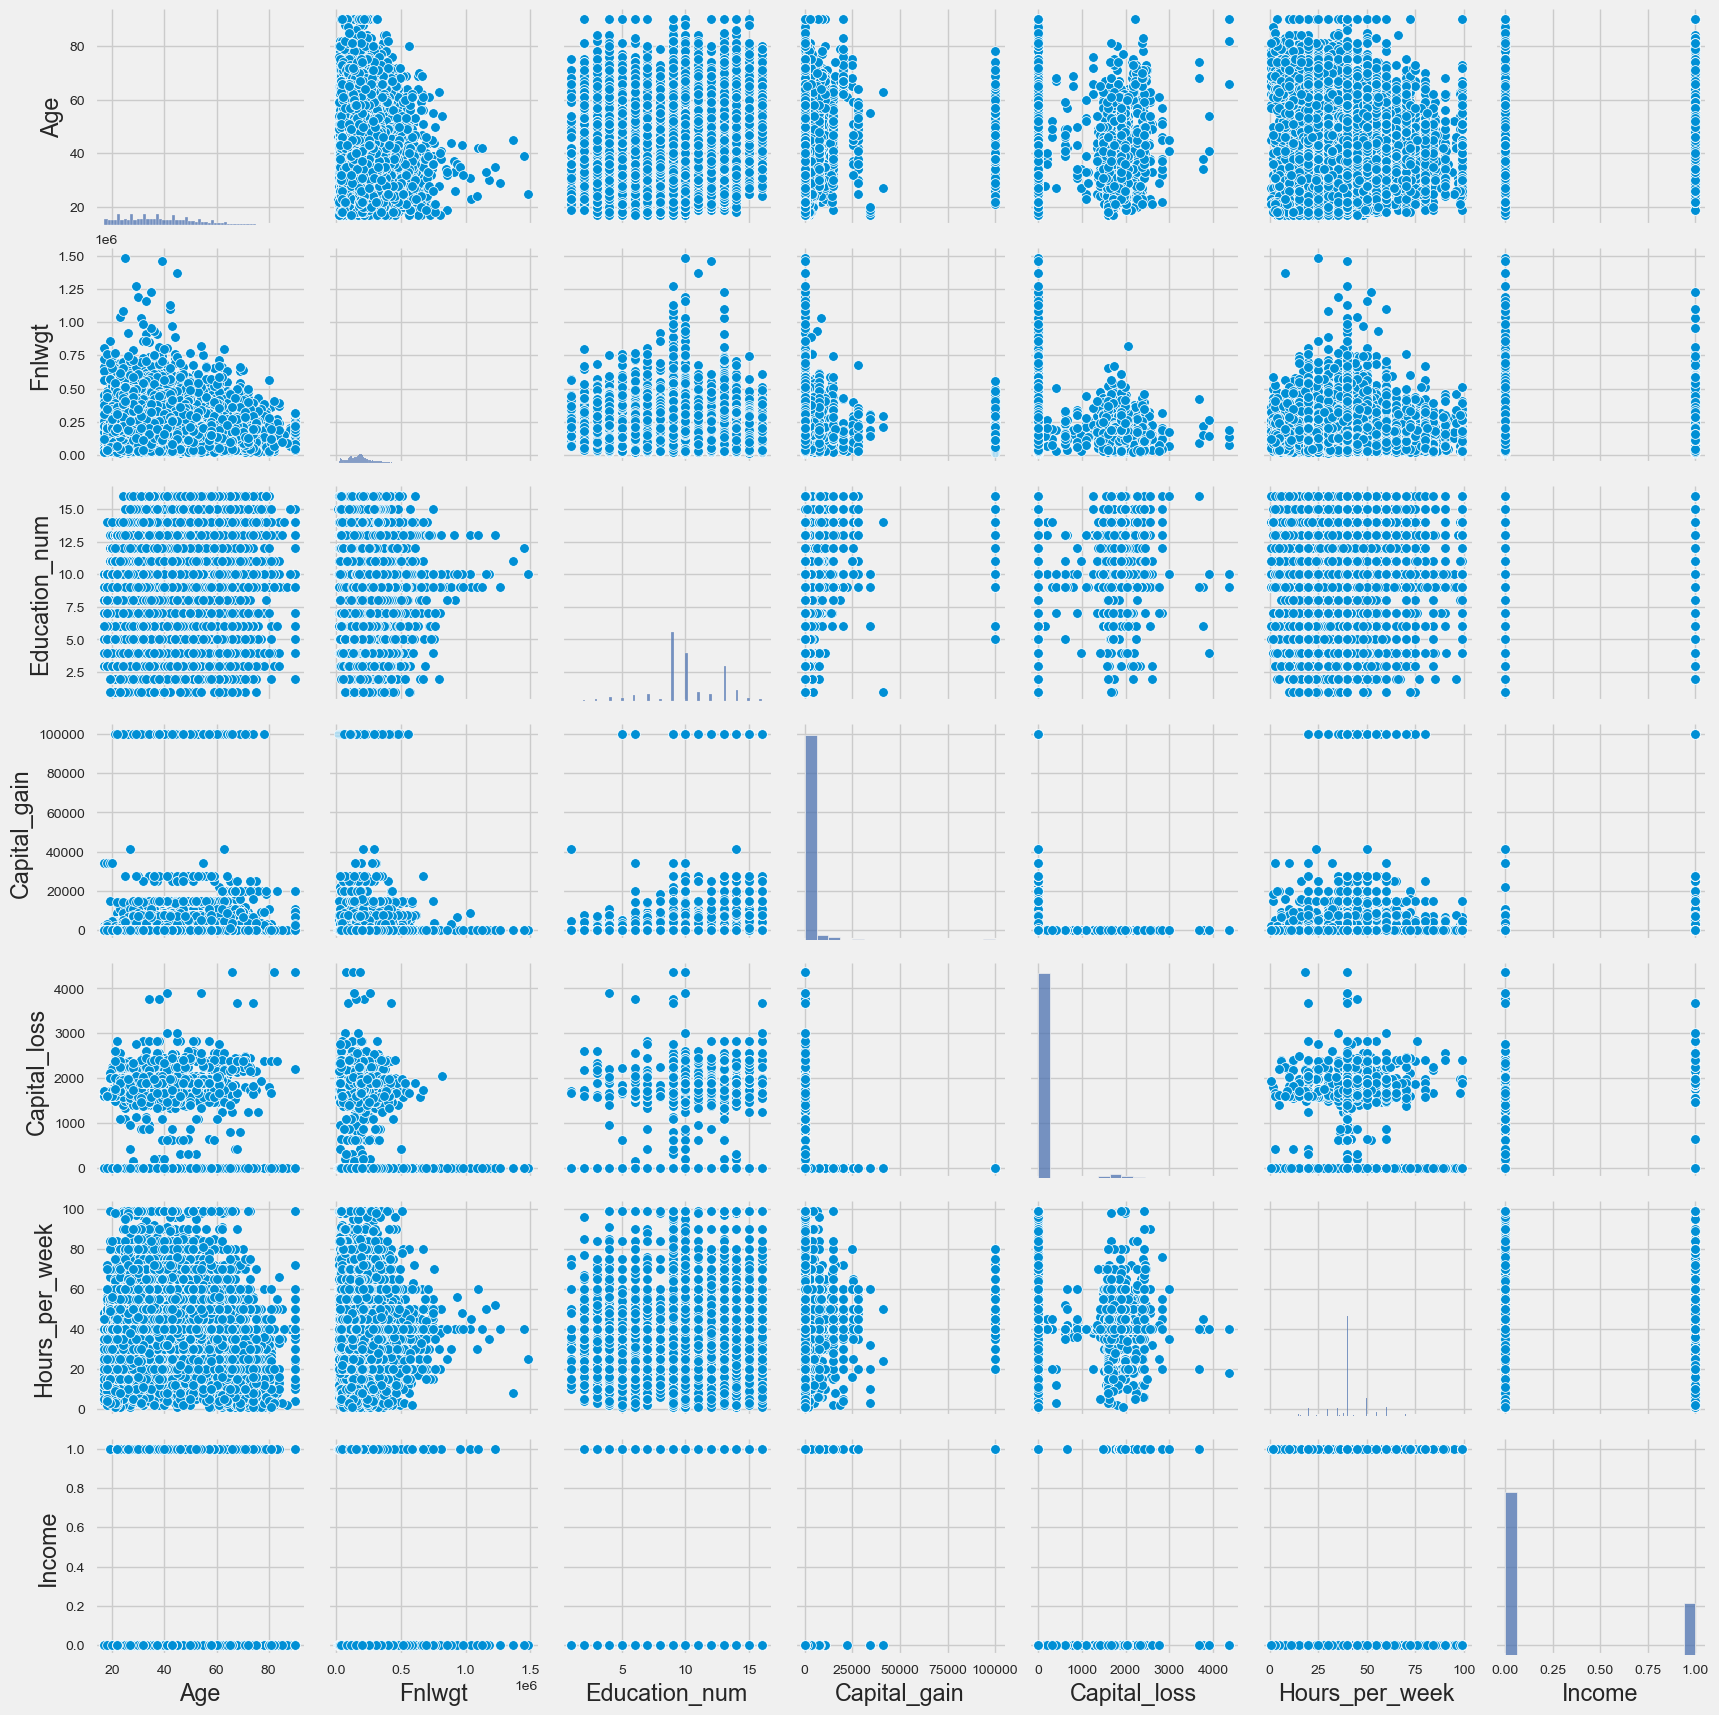

In [26]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.savefig('multi1.png')
plt.show()

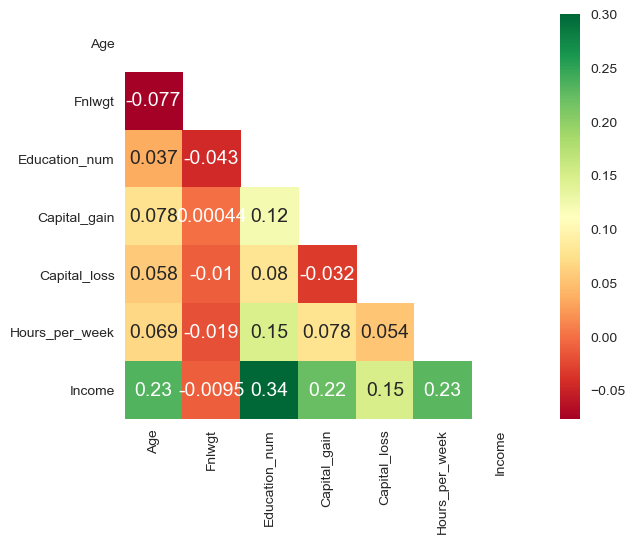

In [27]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

In [28]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

Feature Selection

In [29]:
X = df.drop('Income', axis=1)
Y = df['Income']

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [31]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [32]:
feature_imp = selector.feature_importances_

In [33]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.36
1 4.45
2 16.52
3 3.56
4 8.98
5 7.33
6 7.48
7 9.46
8 1.45
9 2.7
10 8.84
11 2.77
12 9.36
13 1.74


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [35]:
X = X.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_loss', 'Native_country'], axis=1)

Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

Fixing imbalanced dataset using Oversampling

In [38]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: Income, dtype: object

In [39]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [40]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [41]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [42]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: Income, dtype: object

train test split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42) 

In [44]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39550, 8)
X_test shape: (9888, 8)
Y_train shape: (39550,)
Y_test shape: (9888,)


Data Modelling

Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [45]:
log_reg = LogisticRegression(random_state=42)

In [52]:
log_reg.fit(X_train, Y_train)
Y_pred_log_reg = log_reg.predict(X_test)

In [53]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 76.05
F1 score: 76.07


KNN Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [55]:
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

In [56]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.61
F1 score: 84.63


Support Vector Classifier

In [57]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [58]:
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)

In [59]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.99
F1 score: 83.09


Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [61]:
dec_tree.fit(X_train, Y_train)
Y_pred_dec_tree = dec_tree.predict(X_test)

In [62]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 91.28
F1 score: 91.75


Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [64]:
ran_for.fit(X_train, Y_train)
Y_pred_ran_for = ran_for.predict(X_test)

In [65]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.57
F1 score: 92.93


Hyperparameter Tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [68]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [69]:
rf_tuned = RandomForestClassifier(random_state=42)

In [70]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [71]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [72]:
rf_cv.best_score_

0.9123135271807838

In [73]:
rf_cv.best_params_

{'n_estimators': 134, 'max_depth': 142}

In [74]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [75]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [76]:
Y_pred_rf_best = rf_best.predict(X_test)

In [77]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.59
F1 score: 92.95


In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

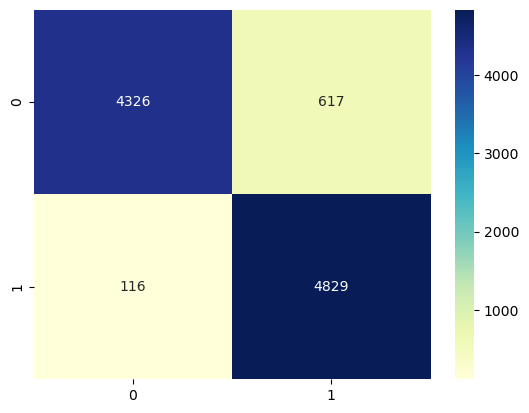

In [79]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [80]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4943
           1       0.89      0.98      0.93      4945

    accuracy                           0.93      9888
   macro avg       0.93      0.93      0.93      9888
weighted avg       0.93      0.93      0.93      9888



Saving the model

In [81]:
# Fit the model on training set
import pickle
model = RandomForestClassifier()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9253640776699029
